In [240]:
import numpy as np
import pandas as pd
import scipy.stats as sy
import matplotlib.pyplot as plt
from sklearn import cluster as sc
from sklearn import feature_selection as sf
from sklearn.decomposition import PCA
from sklearn import preprocessing

scaler = StandardScaler()
data = pd.read_csv("../Data/final_data.csv", delimiter=',')
# data.head(5)
data_scaled = pd.DataFrame(preprocessing.scale(data),columns = data.columns) 

# PCA
pca = PCA(.95)
pca.fit_transform(data_scaled)

# Dump components relations with features:
df = pd.DataFrame(pca.components_,columns=data_scaled.columns)

pca_qs = []

for index, row in df.iterrows():
    pca_qs.append(row.idxmax())

pca_qs.sort()
pca_qs


['Q10_0-1 maand',
 'Q10_0-1 maand',
 'Q10_1-3 maanden',
 'Q10_3-6 maanden',
 'Q11_Ik wil niet vaker en/of meer kilometers hardlopen dan ik nu doe',
 'Q11_Ik wil niet vaker en/of meer kilometers hardlopen dan ik nu doe',
 'Q12C_True',
 'Q12D_True',
 'Q12F_True',
 'Q13C',
 'Q13D',
 'Q13E',
 'Q13G',
 'Q14_Anders, namelijk ...',
 'Q14_Anders, namelijk ...',
 'Q14_Ik begin meestal met hardlopen vanuit of dichtbij het huis van mijn trainingspartner.',
 'Q14_Ik begin meestal met hardlopen vanuit of dichtbij mijn werk.',
 'Q15_Ik reis vaak meer dan 5 km van waar ik woon',
 'Q15_Ik ren altijd binnen 1 km van waar ik woon',
 'Q16B',
 'Q16B',
 'Q16B',
 'Q16B',
 'Q16D',
 'Q16E',
 'Q16E',
 'Q16G',
 'Q43_Nee, ik maak geen gebruik van een sport-app, maar ik heb in het verleden wel een sport-app gebruikt',
 'Q43_Nee, ik maak geen gebruik van een sport-app, maar ik heb in het verleden wel een sport-app gebruikt',
 'Q43_Nee, ik maak geen gebruik van een sport-app, maar ik heb in het verleden wel een spo

In [241]:
X = data.values
X = X.astype(float)
X_train = X
X_val = X[401:]

scaler.fit(X_train)
X_train = scaler.transform(X_train)
scaler.fit(X_val)
X_val = scaler.transform(X_val)

pca = PCA(.95)
pca.fit(X_train)
var = pca.explained_variance_ratio_
var1 = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
# plt.plot(var1)
# var1


In [242]:
X_train = pca.transform(X_train)
X_val = pca.transform(X_val)


In [243]:
print(np.shape(X_train))
pca_kmeans = sc.KMeans(n_clusters=3).fit(X_train)
kmeans = sc.KMeans(n_clusters=3).fit(X)

print(np.shape(X))

(2145, 92)
(2145, 167)


In [244]:
pca_labels = pca_kmeans.labels_
labels = kmeans.labels_
print("pca_labels\n", pca_labels)
print("non pca labels\n", labels)


pca_labels
 [1 2 2 ... 2 2 0]
non pca labels
 [0 2 2 ... 2 2 1]


In [245]:
l = [0,0,0]
pca_l = [0,0,0]
for i in labels:
    l[i] += 1
for i in pca_labels:
    pca_l[i] += 1
l.sort()
pca_l.sort()
print(l, pca_l)

[422, 627, 1096] [422, 627, 1096]


In [246]:
# pd.DataFrame(pca.components_,columns=data_scaled.columns)

array([   0,    3,    4,    8,   14,   15,   21,   23,   28,   29,   35,
         38,   39,   42,   45,   46,   47,   51,   52,   56,   58,   63,
         64,   79,   81,   87,   88,   91,   94,   95,  101,  102,  111,
        112,  114,  116,  117,  119,  125,  127,  131,  132,  143,  145,
        148,  149,  150,  157,  159,  162,  172,  173,  175,  178,  182,
        183,  188,  191,  192,  193,  197,  198,  199,  201,  205,  206,
        207,  212,  219,  221,  229,  237,  241,  244,  246,  247,  248,
        250,  256,  260,  262,  267,  270,  272,  274,  275,  280,  284,
        285,  287,  290,  293,  294,  295,  305,  309,  311,  314,  317,
        318,  319,  321,  327,  331,  336,  343,  345,  349,  351,  354,
        359,  365,  373,  375,  377,  385,  387,  389,  401,  405,  408,
        410,  411,  414,  415,  416,  417,  420,  422,  424,  426,  431,
        434,  435,  437,  442,  447,  448,  454,  458,  459,  463,  465,
        467,  470,  471,  473,  474,  475,  477,  4

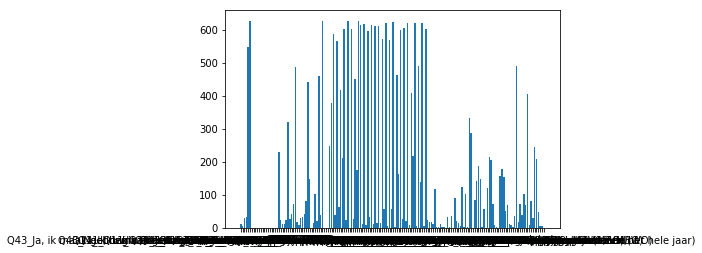

In [309]:
data.to_csv('labels_allQ.csv')
data['labels'] = labels
label0 = data.loc[data['labels'] == 0].astype(float)

sums0 = label0.sum()
plt.bar(label0.columns, sums0)

# plt.show()
# print(data.columns)
# print(sums0[:57])
label0.index.values

7824.0

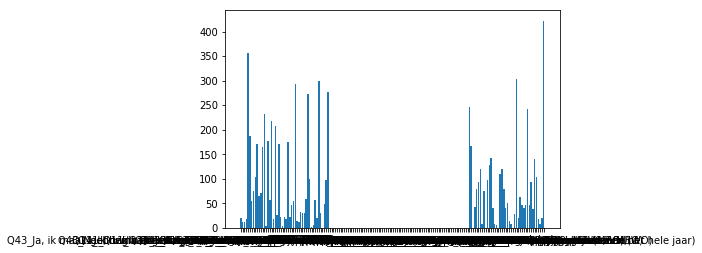

In [303]:
data['labels'] = labels
label1 = data.loc[data['labels'] == 1].astype(float)

sums1 = label1.sum()
plt.bar(label1.columns, sums1)
# for index in range(len(sums1)):
#     if sums1[index] == 0:
#         print(index)
# print(label1.columns)
# plt.show()
# print(sums1[:57])
sum(sums1)
# print(label1.columns[57:138])

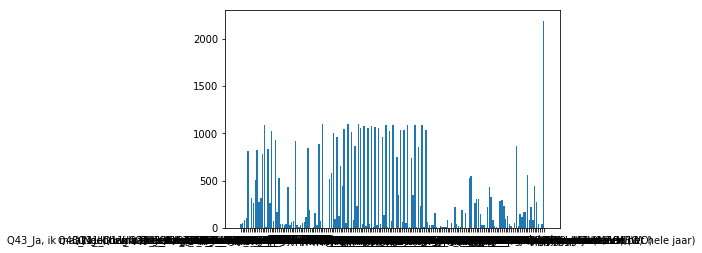

15628.0

In [304]:
data['labels'] = labels
label2 = data.loc[data['labels'] == 2].astype(float)

sums2 = label2.sum()
plt.bar(label2.columns, sums2)

plt.show()
sum(sums2[:57])


In [291]:
print(sums2[138:])


Q47_Man                                                 524.0
Q47_Vrouw                                               549.0
Q51_Anders, namelijk ...                                 15.0
Q51_Basisonderwijs                                        2.0
Q51_HAVO of VWO                                          48.0
Q51_Hoger beroepsonderwijs (HBO), universiteit (WO)     862.0
Q51_Lager beroepsonderwijs (LBO, MAVO, VMBO)             20.0
Q51_Middelbaar beroepsonderwijs (MBO)                   149.0
Q48_<20                                                  27.0
Q48_20-29                                               263.0
Q48_30-39                                               304.0
Q48_40-49                                               309.0
Q48_50-59                                               150.0
Q48_>60                                                  35.0
Q48_0                                                     0.0
Q49_<160                                                 17.0
Q49_160-